In [1]:
import matplotlib.pyplot as plt 
import numpy as np
from scipy.integrate import odeint

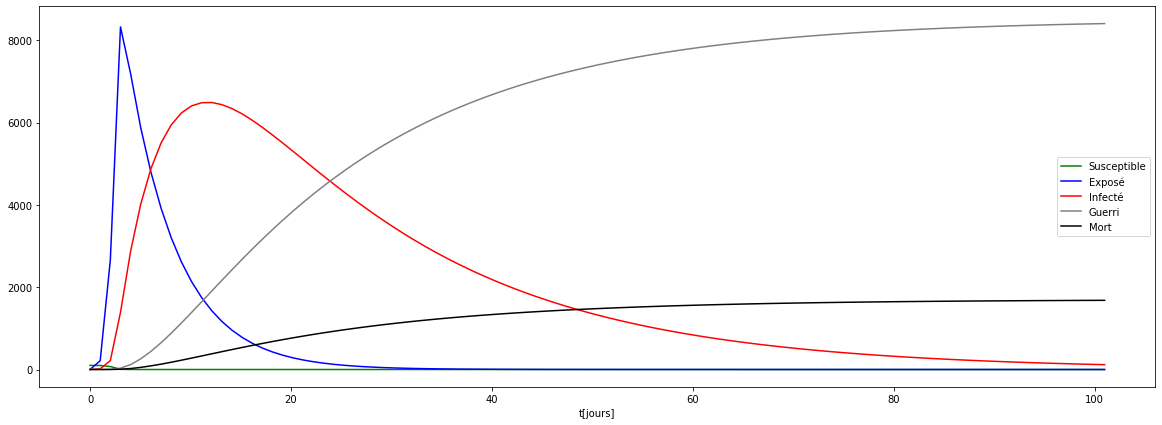

In [13]:
S0 = 100
E0 = 0
I0 = 2
R0 = 0
D0 = 0
def continu(p,alpha,beta,gamma,lamda,delta,tmax):
    N = S0+E0+I0+R0
    t = np.linspace(0,tmax+1,tmax+1)
    def derive(y,t,p,alpha,beta,gamma,lamda,delta):    
        S,E,I,R,D = y
        dSdt = -beta * S * I/ N
        dEdt = beta*S*I - alpha*E
        dIdt = alpha*E - (p*lamda * I) - ((1-p)*delta* I)
        dRdt = p*lamda * I
        dDdt = (1-p)*delta * I
        return dSdt,dEdt,dIdt,dRdt,dDdt
    y0 = S0,E0,I0,R0,D0
    ret = odeint(derive,y0,t,args=(p,alpha,beta,gamma,lamda,delta))
    S,E,I,R,D = ret.T
    temps = range(0,(tmax+1),1) 
    plt.figure(figsize=(20,7))
    plt.plot(t,S,label='Susceptible',color='green')
    plt.plot(t,E,label='Exposé',color='blue')
    plt.plot(t,I,label='Infecté',color='red')
    plt.plot(t,R,label='Guerri',color='grey')    
    plt.plot(t,D,label='Mort',color='black')
    plt.xlabel('t[jours]')
    plt.legend()
    
continu(p=0.8,alpha=0.2,beta=0.4,gamma=0.04,lamda=0.05,delta=0.04,tmax=100)